<a href="https://colab.research.google.com/github/a95123hsu/IST526-Assignment5/blob/main/Question_3_Text_data_visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
data  = 'data/news_articles.csv'
df = pd.read_csv(data, encoding='latin-1')
display(df.head())

df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
# display(df.head())
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['token'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['token']], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [3]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out
display('before: ', df['token'].head())
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
display('after: ' ,df['token'].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

'after: '

0    [sindh, government, decide, bring, public, tra...
1    [asian, market, start, upswe, limited, trading...
2    [share, open, percent, low, follow, tepid, fir...
3    [asian, market, tumble, follow, painful, loss,...
4    [oil, price, slip, barrel, first, time, year, ...
Name: token, dtype: object

In [4]:
# Create Corpus
texts = df['token']
embedding_size=16
w2vmodel = Word2Vec(texts, vector_size=embedding_size, window=5, min_count=2, workers=4)
list_1 = w2vmodel.wv.most_similar('use',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)
word_list_1 = []
for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['provide', 'obligation', 'tiny_mce', 'crrc', 'jpg', 'regulation', 'live', 'technology', 'insurance', 'investigate']


In [5]:
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px

def tsne_plot(w2vmodel):
    "Creates and TSNE model and plots it"    
    
    vocab = list(w2vmodel.wv.key_to_index.keys())    
    embedding_size = w2vmodel.vector_size
    tokens = np.zeros((len(vocab), embedding_size))   

    for word in vocab:
        tokens[w2vmodel.wv.get_index(word)] = w2vmodel.wv.get_vector(word)
      
    tsne_model = TSNE(perplexity=30, n_components=2, n_iter=3000, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the coordinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    fig = px.scatter(
      x= x,       
      y=y,        
      hover_name=vocab,
      size_max=55, 
      range_x=[-50, 50], 
      range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()

# now visualize
tsne_plot(w2vmodel)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f98b9721510>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/loca

1. (week, month, year) they are words for date 
2. (yen, dollar, currency) they are currency words of different countries
3. (fourth, third, second) words for sequence
4. (expensive, cheap) words to describe price
5. (output, production) sysnonym words for output


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('say', 6596), ('year', 3771), ('percent', 3279), ('first', 2202), ('strong', 2132), ('also', 1945), ('last', 1943), ('oil', 1905), ('price', 1873), ('market', 1822), ('make', 1749), ('day', 1625), ('take', 1599), ('world', 1563), ('team', 1539), ('test', 1538), ('match', 1522), ('run', 1427), ('play', 1401), ('time', 1397), ('month', 1380), ('country', 1319), ('wicket', 1308), ('week', 1273), ('high', 1231), ('ball', 1171), ('second', 1162), ('add', 1133), ('early', 1057), ('fall', 1037), ('come', 1032), ('low', 999), ('rise', 977), ('crude', 965), ('new', 950), ('final', 944), ('get', 934), ('go', 931), ('international', 929), ('player', 898), ('game', 894), ('government', 893), ('see', 887), ('well', 865), ('good', 861), ('rate', 857), ('dollar', 846), ('barrel', 842), ('leave', 812), ('cricket', 810), ('start', 807), ('win', 804), ('global', 793), ('lead', 785), ('include', 776), ('give', 773), ('point', 761), ('end', 746), ('expect', 739), ('tell', 736), ('increase', 710), ('trad

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



(-0.5, 1599.5, 799.5, -0.5)

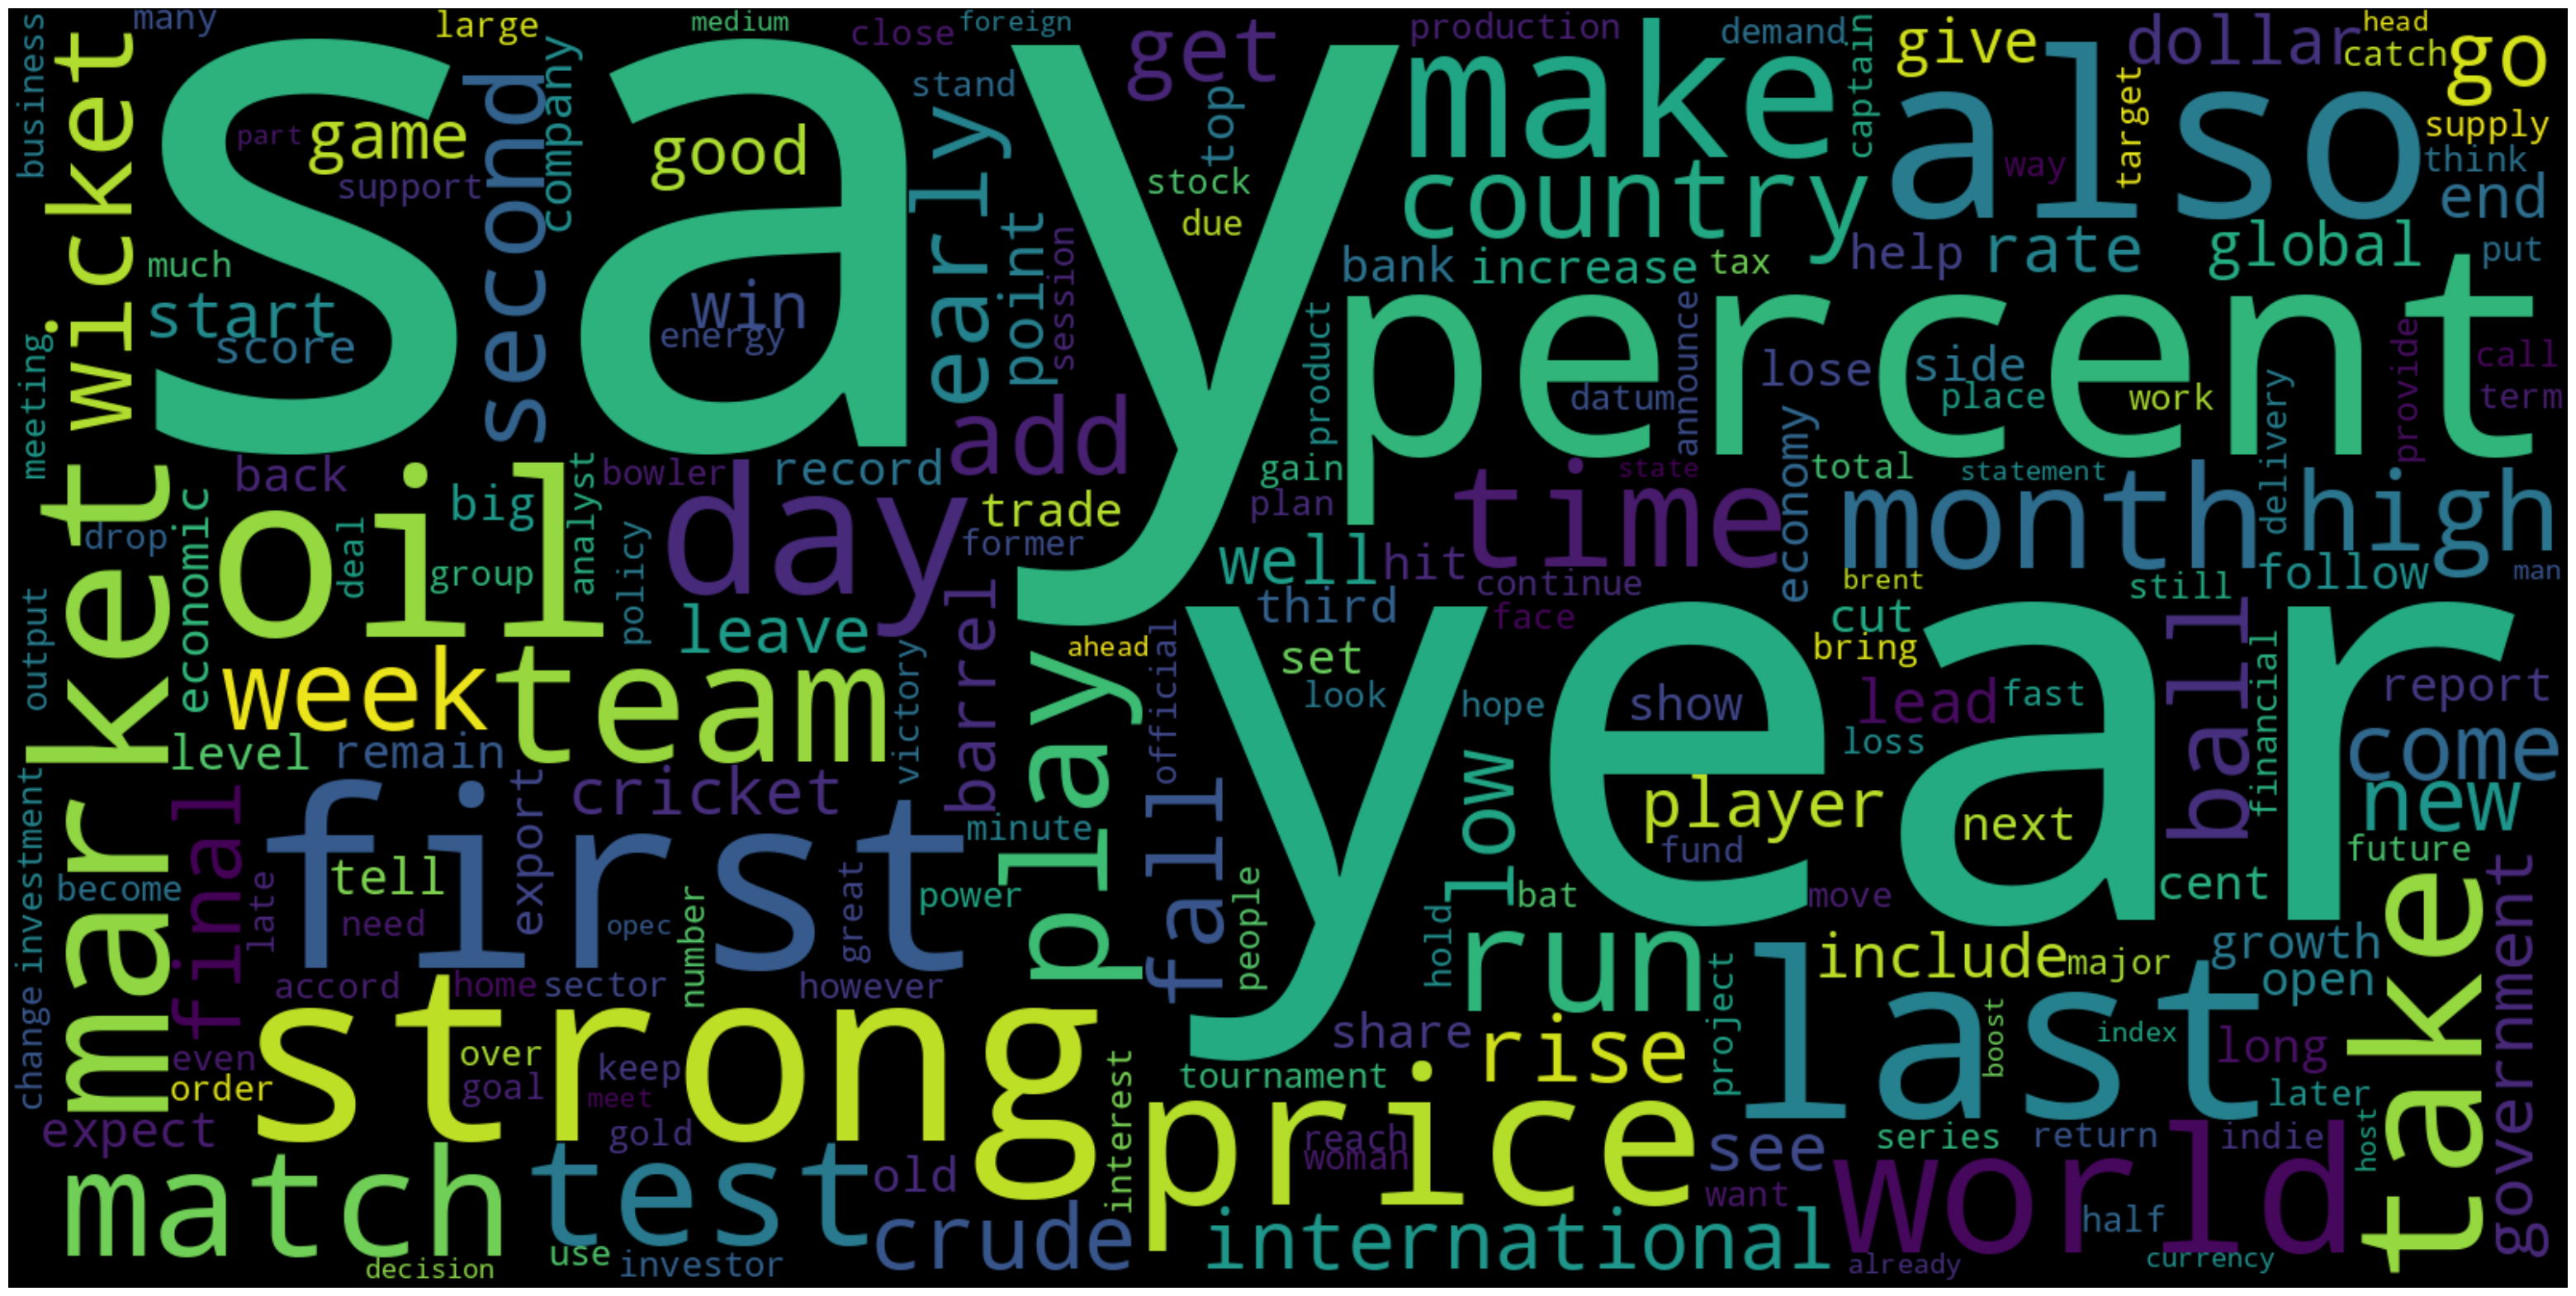

In [6]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

From the word cloud we can learn that the more frequent the word appeared the larger the size is, such as "year" or "say."
Then the similar color of the word, might means the words that have being used together, such as "oil market" or "price rise." 